In [1]:
#  Import Library :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [2]:
# Import and read the Dataset :
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
# Number of the attributes (columns) :
c = len(df.columns)
c

8

In [4]:
# Number of the instances (rows) :
l = len(df.index)
l

2000

In [5]:
# Shape
df.shape

(2000, 8)

In [6]:
# Extraction the missing values :
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
# Fill the mising value :
df["Profession"].fillna("Doctor", inplace = True)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

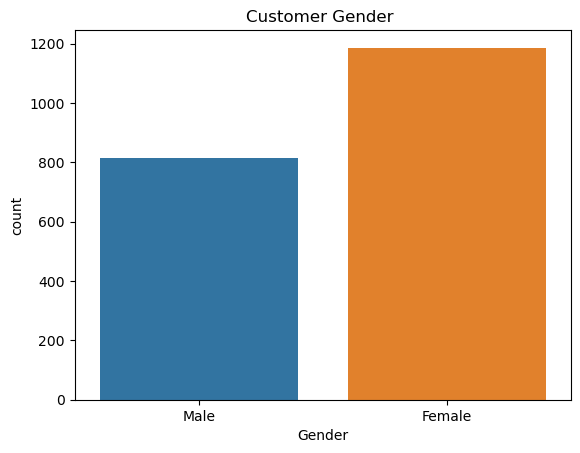

In [8]:
# Visualizate customers by gender :
sb.countplot(x = 'Gender', data = df)
plt.title('Customer Gender ')
plt.show()

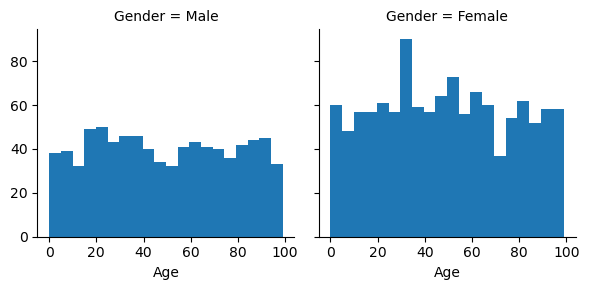

In [9]:
# Visualizate the Gender depending on "Age"
a = sb.FacetGrid(df,col = "Gender")
a.map(plt.hist,'Age',bins=20)
plt.show()

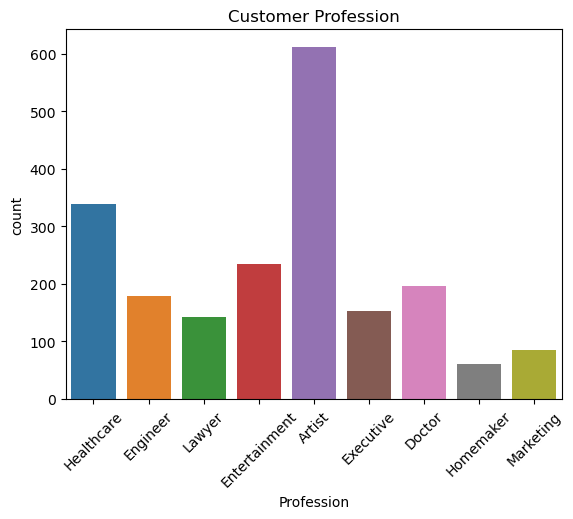

In [10]:
# Visualizate customers by profession :
sb.countplot(x = 'Profession', data = df)
plt.xticks(rotation = 45)
plt.title('Customer Profession')
plt.show()

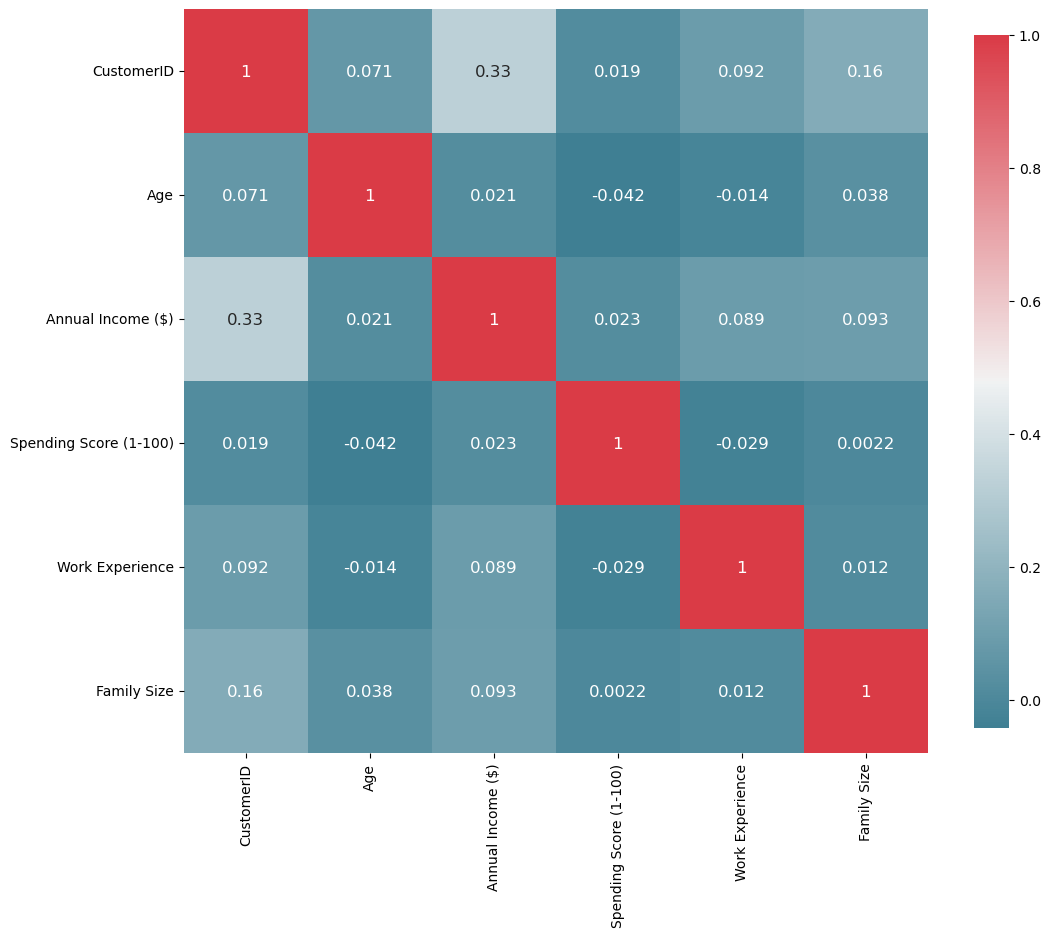

In [11]:
def plot_correlation( df ):
    corr = df.corr() 
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )
    s = sb.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 },ax=ax, annot = True, 
                    annot_kws = { 'fontsize' : 12 })
plot_correlation(df)

In [12]:
# Preparing data (convert to numercale data) :
df["Gender"] = df["Gender"].map({"Male":1,"Female":2})

In [13]:
# Delting an unslesse data from dataset :
df.drop("Profession", axis=1,inplace=True)

In [14]:
# Applying agglomerative algorithm with 4 clusters, using euclidean distance as a metric
model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(df)  

In [15]:
# Agglomerative
a = pd.DataFrame(clust_labels)
a

,0
0,3
1,1
2,2
3,1
4,1
...,...
1995,0
1996,2
1997,2
1998,0


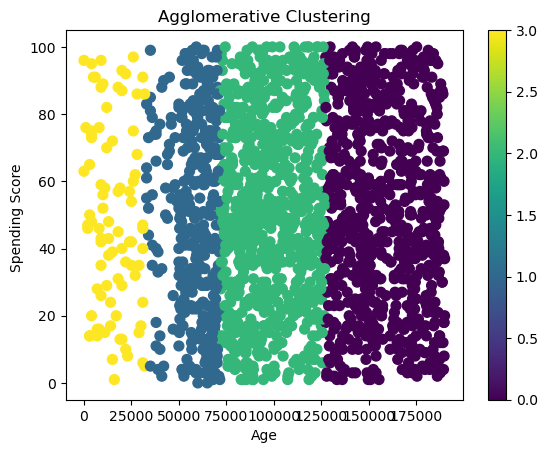

In [16]:
# Agglomerative Cluster Plot
f = plt.figure()
ax = f.add_subplot(111)
scatter = ax.scatter (df ['Annual Income ($)'] , df ["Spending Score (1-100)"] , c = a[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score ")
plt.colorbar(scatter)

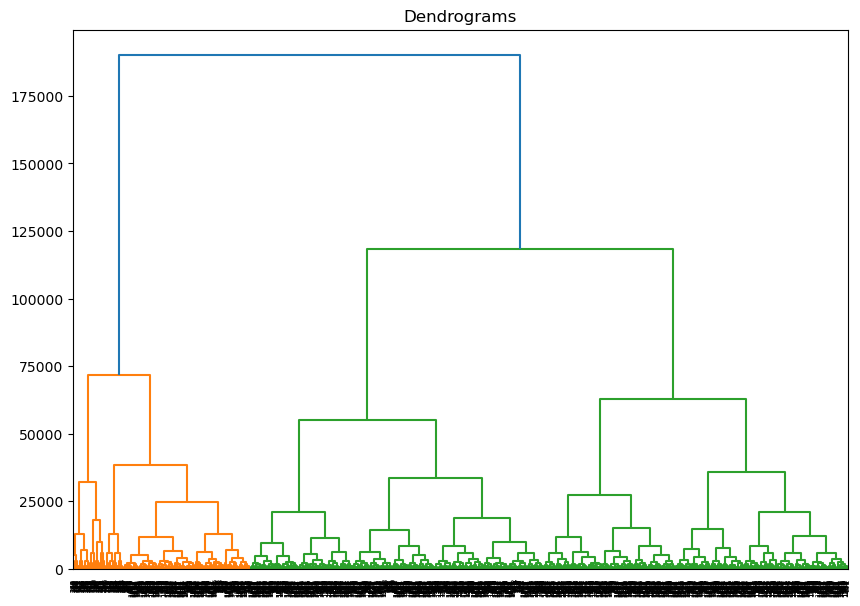

In [17]:
# Agglomerative Visualization : Dendrograms
plt.figure(figsize = (10,7))
plt.title("Dendrograms")
d = shc.dendrogram(shc.linkage(df, method="complete"))

In [18]:
# Cluster our data by choosing 6 as number of clusters
k = KMeans(n_clusters = 6, random_state=0)  
k.fit(df)

KMeans(n_clusters=6, random_state=0)

In [19]:
# K-means Labels
l = pd.DataFrame(k.labels_)
l.head()

,0
0,2
1,2
2,5
3,1
4,2


In [20]:
k.predict(df)
print(k.cluster_centers_)  

[[1.14690341e+03 1.62215909e+00 4.78295455e+01 1.47093574e+05
  5.41590909e+01 4.16477273e+00 4.13352273e+00]
 [9.20708831e+02 1.63007160e+00 4.80739857e+01 6.31007494e+04
  5.00357995e+01 3.86873508e+00 3.74463007e+00]
 [1.58184874e+02 1.57983193e+00 4.41008403e+01 2.15798319e+04
  4.93445378e+01 3.07563025e+00 2.84033613e+00]
 [1.14132102e+03 1.58806818e+00 4.90738636e+01 1.75787716e+05
  5.00539773e+01 4.49431818e+00 3.76988636e+00]
 [1.17827778e+03 1.59356725e+00 5.07456140e+01 1.19747380e+05
  5.18450292e+01 4.55263158e+00 3.95614035e+00]
 [9.32627404e+02 1.53846154e+00 5.06346154e+01 9.09822380e+04
  4.96971154e+01 3.87740385e+00 3.59375000e+00]]


In [21]:
#  Best K-means value
best = []
m = range(1,7)
for m in m:
    a = KMeans(n_clusters = m)
    a = a.fit(df)
    best.append(a.inertia_)

for m, best_value in enumerate(best, 1):
    print(f'm = {m}, Best = {best_value}')

m = 1, Best = 4182788208802.769
m = 2, Best = 1153442852771.8545
m = 3, Best = 595757484652.0983
m = 4, Best = 363601844822.2284
m = 5, Best = 218244814941.50803
m = 6, Best = 141032401322.75748


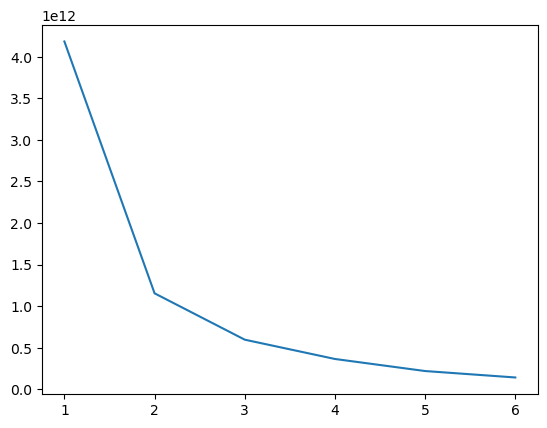

In [26]:
best = []
m_range = np.arange(1,7)
for m in m_range:
    a = KMeans(n_clusters=m)
    a.fit(df)
    best.append(a.inertia_)

plt.plot(m_range,best)
plt.show()